## Inspired by this [guide](http://joshvarty.github.io/AlphaZero/).

In [1]:
from connect2 import Connect2
from connect4 import Connect4
from mcts import MCTS
from model import Model
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
model = Model((Connect4.ROWS, Connect4.COLUMNS, 2), Connect4.COLUMNS, summary=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 4, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 1, 2, 10)     190         ['input_1[0][0]']                
                                                                                                  
 re_lu (ReLU)                   (None, 1, 2, 10)     0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1, 2, 10)     110         ['re_lu[0][0]']                  
                                                                                              

2021-11-28 16:30:00.382811: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.train(Connect4(), nb_iter=10, nb_simulations=100, nb_games=20, nb_epochs=10)

1/10...Done
policy_accuracy:  0.41 value_mse:  0.00
2/10...Done
policy_accuracy:  0.42 value_mse:  0.07
3/10...Done
policy_accuracy:  0.35 value_mse:  0.07
4/10...Done
policy_accuracy:  0.28 value_mse:  0.01
5/10...Done
policy_accuracy:  0.54 value_mse:  0.19
6/10...Done
policy_accuracy:  0.46 value_mse:  0.06
7/10...Done
policy_accuracy:  0.47 value_mse:  0.00
8/10...Done
policy_accuracy:  0.50 value_mse:  0.06
9/10...Done
policy_accuracy:  0.47 value_mse:  0.00
10/10...Done
policy_accuracy:  0.52 value_mse:  0.06


In [4]:
model.predict(Connect4.get_init_state())

(array([0.10869792, 0.14781934, 0.54975206, 0.19373061], dtype=float32),
 0.08710834)

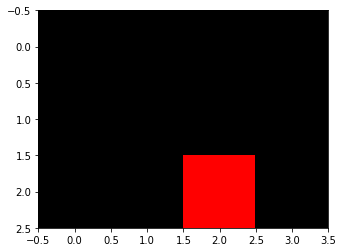

ValueError: invalid literal for int() with base 10: ''

In [10]:
state = Connect4().get_init_state()
Connect4().play_vs(model, state, 50)